# Machine Learning

In [5]:
import pandas as pd
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn import metrics


from sklearn.datasets import fetch_20newsgroups

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

from sklearn.metrics import plot_confusion_matrix

In [6]:
df = pd.read_csv("../EDA/ml_csv.csv")
df.drop(columns="Unnamed: 0", axis=1, inplace=True)
df

,category,merged_text
0,politics,"['mary', 'trump', 'slam', 'susan', 'sarandon',..."
1,politics,"['moment', 'two', 'ukrainian', 'fighter', 'jet..."
2,politics,"['mark', 'esper', 'whats', 'stake', 'donald', ..."
3,politics,"['hunter', 'biden', 'enlists', 'hollywood', 'm..."
4,politics,"['president', 'trump', 'response', 'mark', 'es..."
...,...,...
9016,food,"['classic', 'tater', 'tot', 'casserole', 'gree..."
9017,food,"['stew', 'south', 'india', 'know', 'different'..."
9018,food,"['biscuit', 'self', 'rise', 'flour', 'biscuit'..."
9019,food,"['streusel', 'top', 'banana', 'bread', 'exampl..."


In [7]:
df["category"].value_counts()
category_list = df["category"].unique()

df['category_id'] = df['category'].factorize()[0]

df

,category,merged_text,category_id
0,politics,"['mary', 'trump', 'slam', 'susan', 'sarandon',...",0
1,politics,"['moment', 'two', 'ukrainian', 'fighter', 'jet...",0
2,politics,"['mark', 'esper', 'whats', 'stake', 'donald', ...",0
3,politics,"['hunter', 'biden', 'enlists', 'hollywood', 'm...",0
4,politics,"['president', 'trump', 'response', 'mark', 'es...",0
...,...,...,...
9016,food,"['classic', 'tater', 'tot', 'casserole', 'gree...",4
9017,food,"['stew', 'south', 'india', 'know', 'different'...",4
9018,food,"['biscuit', 'self', 'rise', 'flour', 'biscuit'...",4
9019,food,"['streusel', 'top', 'banana', 'bread', 'exampl...",4


### Pipeline
In order to make this flow easier to work with:  

`scikit-learn` package provides a `Pipeline` class that behaves like a compound classifier:

[
<class 'str'>
<class 'str'>
category                                              technology
merged_text    ['review', 'motorola', 'moto', 'g', 'pure', 'w...
category_id                                                    1
Name: 200, dtype: object


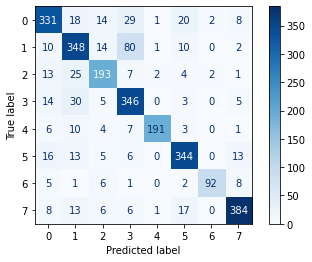

In [10]:
x = df["merged_text"]
y = df["category_id"]

print(df["merged_text"].iloc[0][0])
print(type(df["merged_text"].iloc[0][0]))
print(type(df["merged_text"].iloc[0]))

print(df[df["category_id"] == 1].iloc[0])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
text_clf = Pipeline([('vect', CountVectorizer()), ('clf', MultinomialNB())])
    
model = text_clf.fit(x_train, y_train)
y_pred = model.predict(x_test)
dis = plot_confusion_matrix(model, x_test, y_test, cmap="Blues", values_format=".3g")


In [5]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print(f"accuaracy score: {accuracy_score(y_test,y_pred)}")
print(f"precision_score: {precision_score(y_test,y_pred, average='micro')}")# TP / TP + FP
print(f"recall_score: {recall_score(y_test,y_pred, average='macro')}")# TP / TP + FN
print(f"f1_score: {f1_score(y_test,y_pred, average='weighted')}")# 2*P*R/(P+R)


accuaracy score: 0.8234207609900258
precision_score: 0.8234207609900258
recall_score: 0.8225560051008923
f1_score: 0.824594601354629
